In [3]:
from sklearn.neural_network import MLPClassifier
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE  
from sklearn.metrics import classification_report

from sklearn.model_selection import learning_curve





Using TensorFlow backend.


In [4]:
path = "."
#path = "/Users/willemvandemierop/Documents/Master AI/Introduction to AI/Coursework"
filename_read = os.path.join(path, "All_data_patients_correct.csv")
patient_all = pd.read_csv(filename_read)
PAL = patient_all
print("All patients\n", PAL.head())
PAL = shuffle(PAL)
print("All patients shuffled\n",PAL.head())
print("Patients data size", PAL.shape)

min_max_scaler = preprocessing.MinMaxScaler()
PAL[['heartbeat']] = min_max_scaler.fit_transform(PAL[['heartbeat']].values)

print("\nPatients data normalized heartbeat\n", PAL.head())

result = []
for x in PAL.columns:
    if x != 'label':
        result.append(x)

X = PAL[result].values
X = np.delete(X,0,1)
y = PAL['label'].values
print("X data \n", X[0:5])



All patients
     time         x         y         z  heartbeat  label
0    0.0  0.184021  0.679169 -0.476990       87.0     -1
1   30.0 -0.301010  0.805710  0.487167       95.0     -1
2   60.0 -0.323517  0.923447  0.146362       84.0     -1
3   90.0 -0.509674  0.855102 -0.049118       85.0     -1
4  120.0 -0.387756  0.919067  0.023758       82.0     -1
All patients shuffled
           time         x         y         z  heartbeat  label
24233   3000.0 -0.190933  0.501877 -0.837692       65.0      3
13309   4770.0  0.066544 -0.663376 -0.734009       85.0      2
10434  21150.0 -0.056702 -0.203430 -0.975616       54.0      2
24042  26520.0 -0.322281 -0.771881 -0.539795       80.0      0
25680  18390.0 -0.479919 -0.115234 -0.857864       48.0      2
Patients data size (25781, 6)

Patients data normalized heartbeat
           time         x         y         z  heartbeat  label
24233   3000.0 -0.190933  0.501877 -0.837692   0.269663      3
13309   4770.0  0.066544 -0.663376 -0.734009   0.4

In [6]:
y[y == -1] = 6
one_hot = np.identity(7)

labels_one_hot = []
for i in range(y.shape[0]):
    labels_one_hot.append(one_hot[y[i]])
    
print("labels one hot\n",labels_one_hot[0:5])

labels one hot
 [array([0., 0., 0., 1., 0., 0., 0.]), array([0., 0., 1., 0., 0., 0., 0.]), array([0., 0., 1., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0.]), array([0., 0., 1., 0., 0., 0., 0.])]


398
Training set loss: 0.622798


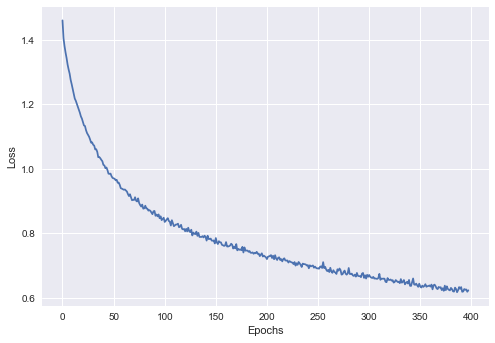

Fold #1, Training Size: 69594, Validation Size: 5157
              precision    recall  f1-score   support

           0       0.56      0.47      0.52       443
           1       0.39      0.10      0.15       355
           2       0.78      0.81      0.79      2496
           3       0.66      0.83      0.74       618
           4       0.68      0.80      0.74        75
           5       0.71      0.76      0.73      1090
           6       0.53      0.36      0.43        80

    accuracy                           0.72      5157
   macro avg       0.62      0.59      0.59      5157
weighted avg       0.70      0.72      0.70      5157

Accuracy: 0.72
275
Training set loss: 0.697033


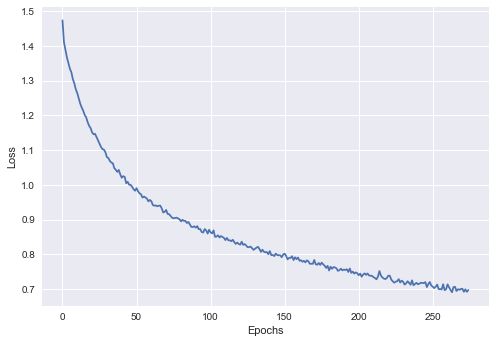

Fold #2, Training Size: 69335, Validation Size: 5156
              precision    recall  f1-score   support

           0       0.55      0.35      0.43       408
           1       0.40      0.06      0.11       337
           2       0.73      0.88      0.79      2533
           3       0.70      0.77      0.73       643
           4       0.79      0.69      0.74        75
           5       0.74      0.68      0.71      1072
           6       0.65      0.35      0.46        88

    accuracy                           0.71      5156
   macro avg       0.65      0.54      0.57      5156
weighted avg       0.69      0.71      0.69      5156

Accuracy: 0.71
456
Training set loss: 0.614657


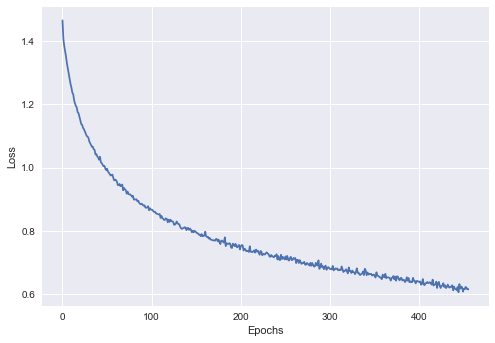

Fold #3, Training Size: 69524, Validation Size: 5156
              precision    recall  f1-score   support

           0       0.59      0.40      0.48       439
           1       0.44      0.12      0.18       347
           2       0.77      0.84      0.80      2506
           3       0.66      0.86      0.75       643
           4       0.76      0.79      0.78        72
           5       0.76      0.76      0.76      1073
           6       0.46      0.34      0.39        76

    accuracy                           0.73      5156
   macro avg       0.63      0.59      0.59      5156
weighted avg       0.71      0.73      0.71      5156

Accuracy: 0.73
327
Training set loss: 0.660987


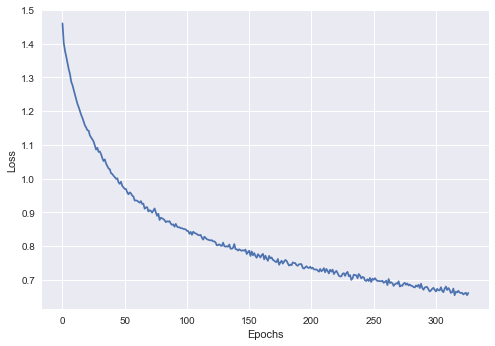

Fold #4, Training Size: 70077, Validation Size: 5156
              precision    recall  f1-score   support

           0       0.71      0.35      0.47       443
           1       0.43      0.15      0.22       336
           2       0.74      0.84      0.79      2427
           3       0.73      0.77      0.75       637
           4       0.67      0.96      0.79        68
           5       0.73      0.80      0.76      1162
           6       0.49      0.34      0.40        83

    accuracy                           0.73      5156
   macro avg       0.64      0.60      0.60      5156
weighted avg       0.71      0.73      0.71      5156

Accuracy: 0.73
287
Training set loss: 0.666565


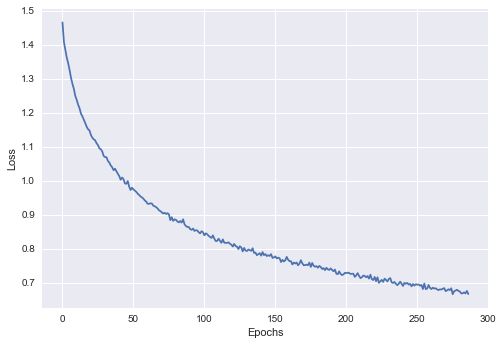

Fold #5, Training Size: 69734, Validation Size: 5156
              precision    recall  f1-score   support

           0       0.65      0.40      0.49       416
           1       0.35      0.09      0.15       369
           2       0.73      0.88      0.80      2476
           3       0.80      0.73      0.76       644
           4       0.74      0.65      0.69        66
           5       0.71      0.75      0.73      1099
           6       0.60      0.34      0.43        86

    accuracy                           0.72      5156
   macro avg       0.66      0.55      0.58      5156
weighted avg       0.70      0.72      0.70      5156

Accuracy: 0.72


In [10]:
kf = KFold(5)

mlp = MLPClassifier(activation = 'relu',alpha = 0.00001,hidden_layer_sizes=(600,500,100), max_iter=1000,solver = 'adam')    
#mlp.output_activation = 'softmax'

fold = 1
# The data is split five ways, for each fold, the 
# Perceptron is trained, tested and evaluated for accuracy
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    smt = SMOTE()
    X_train, y_train = smt.fit_sample(X_train, y_train)
    mlp.fit(X[train_index],y[train_index])
    
    #pd.DataFrame(mlp.loss_curve_).plot()
    print(len(mlp.loss_curve_))
    
    plt.plot(range(0,len(mlp.loss_curve_)),mlp.loss_curve_)
    #plt.show()
    #print(mlp.loss_curve_) 
    print("Training set loss: %f" % mlp.loss_)
    #loss_values = mlp.loss_
    #print(loss_values)
    #print("Training set loss: %f" % mlp.loss_)
    '''epochs = range(1, len(loss_values)+1)
    plt.plot(epochs, loss_values, label='Training Loss')
    '''
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    plt.show()
    
    y_pred = mlp.predict(X[test_index])
    #print(y_test)
    #print(y_pred)
    print(f"Fold #{fold}, Training Size: {len(X_train)}, Validation Size: {len(X_test)}")
    print(classification_report(y_test,y_pred)) 
    print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
    
    
    

    
    
    
    fold += 1



i started


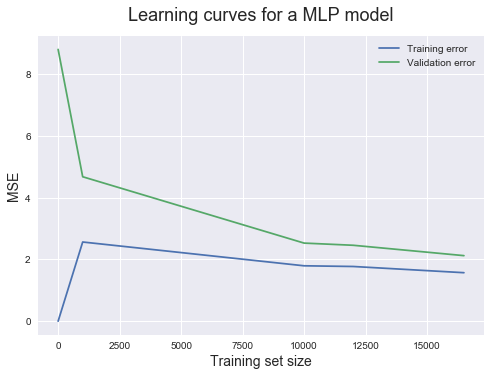

In [11]:
kf = KFold(5)
train_sizes = [1,1000,10000,12000,16499]
#train_scores_mean = -train_scores.mean(axis = 1)

print('i started')
train_sizes, train_scores, validation_scores = learning_curve(
estimator = MLPClassifier(activation = 'relu',alpha = 0.00001,hidden_layer_sizes=(600,500,100), max_iter=1000,solver = 'adam'), 
X = X_train,
y = y_train, train_sizes = train_sizes, cv = 5,scoring = 'neg_mean_squared_error', shuffle = True)

train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a MLP model', fontsize = 18, y = 1.03)
plt.legend()



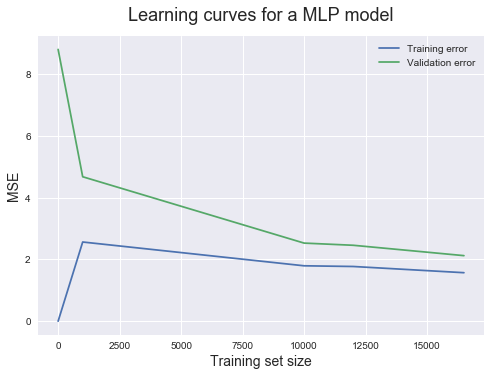

In [12]:


plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a MLP model', fontsize = 18, y = 1.03)
plt.legend()
